In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
data=pd.read_csv('/content/spam_ham_dataset.csv')

In [21]:
data.head

<bound method NDFrame.head of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  

[5171 rows x 4 columns]>

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [23]:
data.nunique()

Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

In [24]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [25]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [26]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [27]:
X = data['text']
y = data['label_num']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [30]:
model = MultinomialNB()



In [31]:
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [32]:
y_pred = model.predict(X_test_vectorized)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [34]:
accuracy_model = model.score(X_test_vectorized, y_test)
print(f"Accuracy: {accuracy_model:.2f}")

Accuracy: 0.97


In [35]:
def predict_email(email_text):
    email_text_vectorized = vectorizer.transform([email_text])
    prediction = model.predict(email_text_vectorized)
    if prediction == 1:
        return "This email is spam."
    else:
        return "This email is not spam."


In [36]:
print(predict_email("Earn money fast!"))

This email is spam.


In [37]:
print(predict_email("Nominate yourself for the Unstop Talent Awards 2024."))

This email is spam.


In [38]:
print(predict_email("I am Priyam Pal...I am pursuing B.Tech from MCKV Institute of Engineering..."))

This email is not spam.


In [39]:
print(predict_email("WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."))

This email is spam.


In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train_vectorized, y_train)


DecisionTreeClassifier()

In [41]:
y_pred = clf.predict(X_test_vectorized)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       742
           1       0.88      0.91      0.90       293

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



In [43]:
accuracy_clf = clf.score(X_test_vectorized, y_test)
print(f"Accuracy: {accuracy_clf:.2f}")

Accuracy: 0.94


In [44]:
def predict_email(email_text):
    email_text_vectorized = vectorizer.transform([email_text])
    prediction = clf.predict(email_text_vectorized)
    if prediction == 1:
        return "This email is spam."
    else:
        return "This email is not spam."

In [45]:
print(predict_email("I am Priyam Pal...I am pursuing B.Tech from MCKV Institute of Engineering..."))

This email is spam.


In [46]:
clf_2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_2.fit(X_train_vectorized, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = clf.predict(X_test_vectorized)



In [48]:
# Evaluating the model
accuracy_clf_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_clf_2)

Accuracy: 0.9420289855072463


In [49]:
def predict_email(email_text):
    email_text_vectorized = vectorizer.transform([email_text])
    prediction = clf.predict(email_text_vectorized)
    if prediction == 1:
        return "This email is spam."
    else:
        return "This email is not spam."

In [50]:
print(predict_email("I am Saptarshi Parui...I am pursuing B.Tech from MCKV Institute of Engineering..."))

This email is spam.


<ipython-input-51-8ad9d4bbb273>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


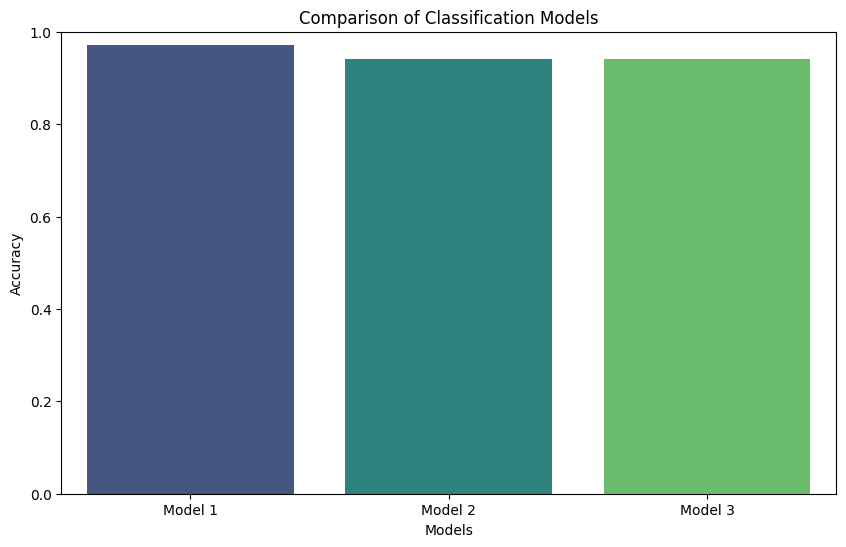

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy scores for each model
models = ["Model 1", "Model 2", "Model 3"]
accuracies = [accuracy_model, accuracy_clf, accuracy_clf_2]  # Replace with your actual accuracy scores

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Comparison of Classification Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy
plt.show()


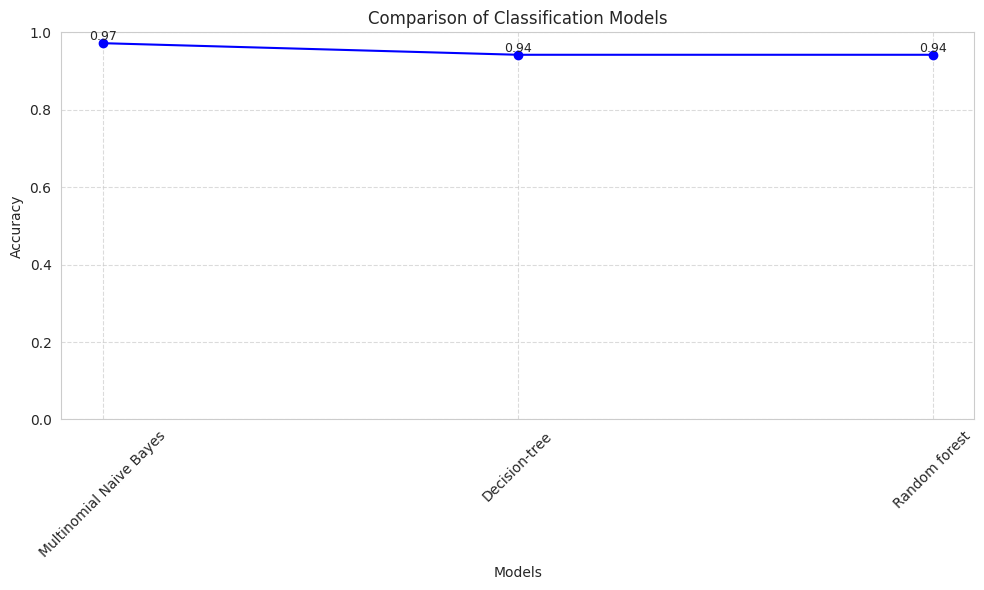

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy scores for each model
models = ["Multinomial Naive Bayes", "Decision-tree", "Random forest"]
accuracies = [accuracy_model, accuracy_clf, accuracy_clf_2]  # Replace with your actual accuracy scores

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(models, accuracies, marker='o', color='b', linestyle='-')
plt.title("Comparison of Classification Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
for x, y in zip(models, accuracies):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()
